# Neural Network Lab: Building and Understanding Neural Networks

## Lab Overview
In this lab, you will:
1. Learn what neural networks are
2. See a complete example of a simple neural network
3. Implement your own neural network with custom forward and backward functions
4. Understand backpropagation by implementing it from scratch

**Note:** Complete all cells marked with `# YOUR CODE HERE` and remove the `raise NotImplementedError()` line.

---

## Introduction: What is a Neural Network?

### Question:
What is a neural network in the context of machine learning?

<details>
<summary>Click to reveal the answer</summary>

In machine learning, a neural network is an artificial mathematical model used to approximate nonlinear functions.

</details>

---
## Part 1: Complete Example - Simple Neural Network

First, let's see a complete working example of a simple neural network that learns to fit a linear function: **y = ax + b**

**Run this cell to see how a neural network works:**

Epoch [100/1000], Loss: 4.3659
Epoch [200/1000], Loss: 4.2009
Epoch [300/1000], Loss: 4.1980
Epoch [400/1000], Loss: 4.1979
Epoch [500/1000], Loss: 4.1979
Epoch [600/1000], Loss: 4.1979
Epoch [700/1000], Loss: 4.1979
Epoch [800/1000], Loss: 4.1979
Epoch [900/1000], Loss: 4.1979
Epoch [1000/1000], Loss: 4.1979

Learned parameters: a = 1.9997, b = 3.0743
True parameters: a = 2.0000, b = 3.0000


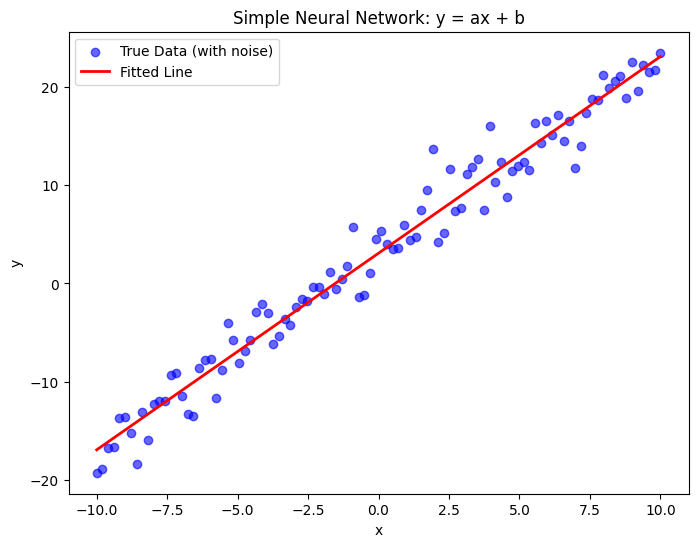

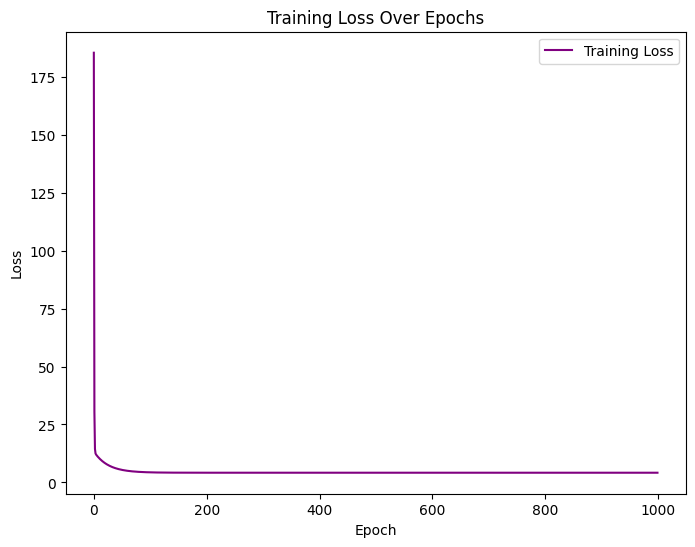

In [1]:
# Simple Neural Network to Fit y = ax + b

# Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set a seed for reproducibility
torch.manual_seed(0)

# Define the Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Define a single linear layer (y = ax + b)
        self.linear = nn.Linear(1, 1)  # Input size = 1, output size = 1

    def forward(self, x):
        # Pass input through the linear layer
        return self.linear(x)

# Generate Synthetic Data
x = torch.linspace(-10, 10, 100).unsqueeze(1)
y_true = 2 * x + 3 + torch.randn_like(x) * 2

# Initialize Model, Loss Function, and Optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the Model
num_epochs = 1000
losses = []

for epoch in range(num_epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y_true)
    losses.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

a = model.linear.weight.item()
b = model.linear.bias.item()
print(f"\nLearned parameters: a = {a:.4f}, b = {b:.4f}")
print(f"True parameters: a = 2.0000, b = 3.0000")

# Visualizing the Results
y_pred = model(x).detach()

plt.figure(figsize=(8, 6))
plt.scatter(x, y_true, label="True Data (with noise)", color="blue", alpha=0.6)
plt.plot(x, y_pred, label="Fitted Line", color="red", linewidth=2)
plt.title("Simple Neural Network: y = ax + b")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(losses, label="Training Loss", color="purple")
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

---
## Part 2: Exercise - Custom Neural Network with Forward and Backward Functions

Now it's your turn! Complete the methods below to implement a custom neural network.

**Your Task:**
1. Implement the `forward()` method to compute y = ax + b
2. Implement the `backward()` method to compute predictions and loss

**Hints:**
- For forward: multiply weight by x and add bias
- For backward: compute y_pred using forward(), then compute Mean Squared Error loss

In [2]:
# Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set a seed for reproducibility
torch.manual_seed(0)

# Define the Neural Network with custom forward and backward functions
class SimpleNNCustom(nn.Module):
    def __init__(self):
        super(SimpleNNCustom, self).__init__()
        self.weight = torch.randn(1, requires_grad=True)
        self.bias = torch.randn(1, requires_grad=True)

    def forward(self, x):
        """
        Custom forward pass: y = ax + b
        
        Args:
            x: Input tensor
        
        Returns:
            y: Output tensor computed as weight * x + bias
        """
        # Compute the Linear Forward Pass
        return self.weight * x + self.bias
    
    def backward(self, x, y_true):
        """
        Custom backward pass: Compute gradients manually.
        
        Args:
            x: Input tensor
            y_true: True target values
        
        Returns:
            loss: Computed loss value
        """

        # Predict a Forward Pass
        y_pred = self.forward(x)

        # Add some noise to fix errors
        #noise = 0.0001

        # Get the Mean Square Loss
        loss = torch.mean((y_pred - y_true)**2)

        # Apply the Gradient / Learning to the Weights and Biases 
        loss.backward()

        # Return the Loss
        return loss

In [3]:
# Test your implementation
torch.manual_seed(42)
test_model = SimpleNNCustom()
test_x = torch.tensor([[1.0], [2.0], [3.0]])
test_y = torch.tensor([[3.0], [5.0], [7.0]])

# Test forward pass
output = test_model.forward(test_x)
assert output.shape == test_x.shape, "Forward pass output shape is incorrect"
assert output.requires_grad, "Forward pass output should require gradients"

# Test backward pass
test_model.weight = torch.tensor([2.0], requires_grad=True)
test_model.bias = torch.tensor([1.0], requires_grad=True)
loss = test_model.backward(test_x, test_y)
assert loss.item() >= 0, "Loss should be positive"
assert test_model.weight.grad is not None, "Gradients should be computed for weight"
assert test_model.bias.grad is not None, "Gradients should be computed for bias"

print("✓ All tests passed for Part 2!")


✓ All tests passed for Part 2!


### Train and Visualize Your Custom Network

Epoch [100/1000], Loss: 4.3668
Epoch [200/1000], Loss: 4.2009
Epoch [300/1000], Loss: 4.1980
Epoch [400/1000], Loss: 4.1979
Epoch [500/1000], Loss: 4.1979
Epoch [600/1000], Loss: 4.1979
Epoch [700/1000], Loss: 4.1979
Epoch [800/1000], Loss: 4.1979
Epoch [900/1000], Loss: 4.1979
Epoch [1000/1000], Loss: 4.1979

Learned parameters: a = 1.9997, b = 3.0743
True parameters: a = 2.0000, b = 3.0000


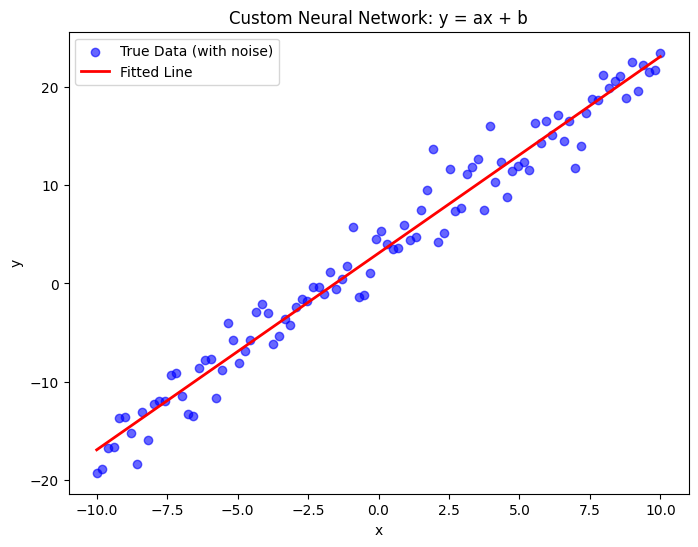

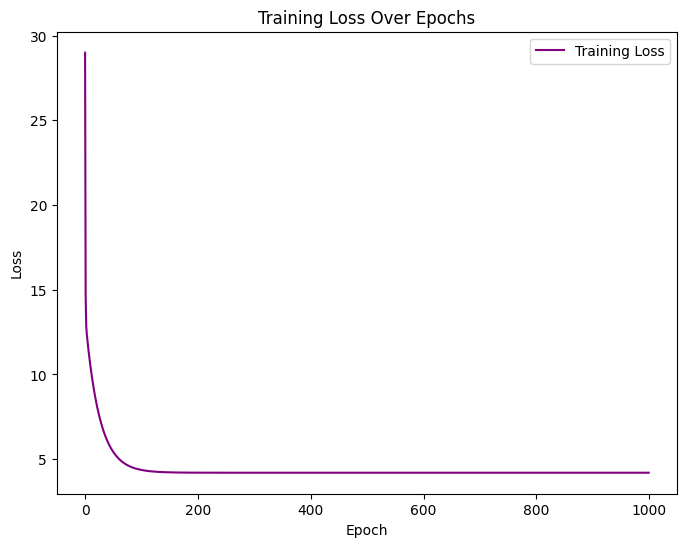

In [4]:
# Generate Synthetic Data
torch.manual_seed(0)
x = torch.linspace(-10, 10, 100).unsqueeze(1)
y_true = 2 * x + 3 + torch.randn_like(x) * 2

# Initialize Model and Optimizer
model = SimpleNNCustom()
optimizer = optim.SGD([model.weight, model.bias], lr=0.01)

# Training
num_epochs = 1000
losses = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    loss = model.backward(x, y_true)
    losses.append(loss.item())
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

a = model.weight.item()
b = model.bias.item()
print(f"\nLearned parameters: a = {a:.4f}, b = {b:.4f}")
print(f"True parameters: a = 2.0000, b = 3.0000")

# Visualize
y_pred = model.forward(x).detach()

plt.figure(figsize=(8, 6))
plt.scatter(x, y_true, label="True Data (with noise)", color="blue", alpha=0.6)
plt.plot(x, y_pred, label="Fitted Line", color="red", linewidth=2)
plt.title("Custom Neural Network: y = ax + b")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(losses, label="Training Loss", color="purple")
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

---
## Part 3: Advanced Exercise - Understanding Backpropagation

Now implement backpropagation completely from scratch without PyTorch's automatic differentiation!

**Mathematical Background:**
- Forward pass: y = ax + b
- Loss: L = (1/n) × Σ(y_pred - y_true)²
- Gradient of loss w.r.t. y_pred: ∂L/∂y = (2/n) × (y_pred - y_true)
- Gradient of y w.r.t. weight: ∂y/∂w = x
- Gradient of y w.r.t. bias: ∂y/∂b = 1
- Chain rule: ∂L/∂w = (∂L/∂y) × (∂y/∂w)

In [5]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(0)

class SimpleNNManual(torch.nn.Module):
    def __init__(self):
        super(SimpleNNManual, self).__init__()
        self.weight = torch.randn(1, requires_grad=False)
        self.bias = torch.randn(1, requires_grad=False)

    def forward(self, x):
        """Forward pass: y = ax + b"""
        return self.weight * x + self.bias
    
    def compute_loss(self, x, y_true):
        """Computes Mean Squared Error loss"""
        y_pred = self.forward(x)
        loss = ((y_pred - y_true) ** 2).mean()
        return loss

    def backward(self, x, y_true, learning_rate=0.01):
        """
        Manually computes gradients and updates parameters.
        
        Returns:
            loss: Computed loss value
        """
        n = len(y_true)

        # Compute the Forward Pass
        y_pred = self.forward(x)

        # Figure out backpropogation from scratch
        loss_grad = (2/n) * (y_pred - y_true)

        # Get the Gradients with respec to y
        weight_grad = x
        bias_grad = 1

        # Compute the Chain Rule (Create a Tensor Shape with the Sum)
        chain_weight = torch.sum(loss_grad * weight_grad)
        chain_bias = torch.sum(loss_grad * bias_grad)

        # Update the Values
        self.weight = self.weight - chain_weight * learning_rate
        self.bias = self.bias - chain_bias * learning_rate

        # Return the Loss
        return self.compute_loss(x, y_true)

In [6]:
# Test your manual backpropagation implementation
torch.manual_seed(99)
test_model = SimpleNNManual()
test_model.weight = torch.tensor([1.0])
test_model.bias = torch.tensor([0.0])

test_x = torch.tensor([[2.0], [4.0]])
test_y = torch.tensor([[4.0], [8.0]])

# Test forward pass
output = test_model.forward(test_x)
assert torch.allclose(output, test_x), "Forward pass incorrect"

# Test loss computation
loss = test_model.compute_loss(test_x, test_y)
expected_loss = ((test_x - test_y) ** 2).mean()
assert torch.allclose(loss, expected_loss), "Loss computation incorrect"

# Test backward pass
initial_weight = test_model.weight.clone()
initial_bias = test_model.bias.clone()
loss = test_model.backward(test_x, test_y, learning_rate=0.01)
assert test_model.weight != initial_weight, "Weight should be updated"
assert test_model.bias != initial_bias, "Bias should be updated"

print("✓ All tests passed for Part 3!")


✓ All tests passed for Part 3!


### Train and Visualize Your Manual Backprop Network

Epoch [100/1000], Loss: 4.3601
Epoch [200/1000], Loss: 4.2008
Epoch [300/1000], Loss: 4.1980
Epoch [400/1000], Loss: 4.1979
Epoch [500/1000], Loss: 4.1979
Epoch [600/1000], Loss: 4.1979
Epoch [700/1000], Loss: 4.1979
Epoch [800/1000], Loss: 4.1979
Epoch [900/1000], Loss: 4.1979
Epoch [1000/1000], Loss: 4.1979

Learned parameters: a = 1.9997, b = 3.0743
True parameters: a = 2.0000, b = 3.0000


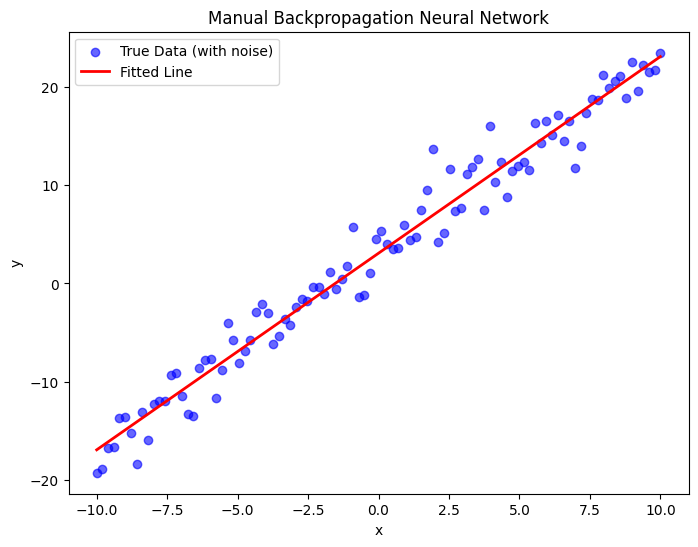

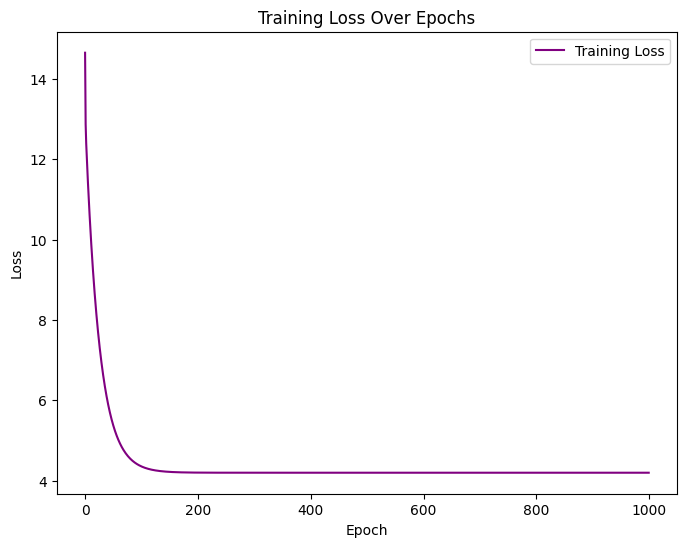

In [7]:
# Generate Synthetic Data
torch.manual_seed(0)
x = torch.linspace(-10, 10, 100).unsqueeze(1)
y_true = 2 * x + 3 + torch.randn_like(x) * 2

# Initialize Model
model = SimpleNNManual()

# Training
num_epochs = 1000
losses = []
learning_rate = 0.01

for epoch in range(num_epochs):
    loss = model.backward(x, y_true, learning_rate)
    losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

a = model.weight.item()
b = model.bias.item()
print(f"\nLearned parameters: a = {a:.4f}, b = {b:.4f}")
print(f"True parameters: a = 2.0000, b = 3.0000")

# Visualize
y_pred = model.forward(x).detach()

plt.figure(figsize=(8, 6))
plt.scatter(x, y_true, label="True Data (with noise)", color="blue", alpha=0.6)
plt.plot(x, y_pred, label="Fitted Line", color="red", linewidth=2)
plt.title("Manual Backpropagation Neural Network")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(losses, label="Training Loss", color="purple")
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

---
## Reflection Questions

After completing this lab, consider these questions:

1. **What is the relationship between the forward and backward passes?**

2. **Why do we need to compute gradients?**

3. **What is the purpose of the learning rate?**

4. **How close did your learned parameters get to the true values (a=2, b=3)?**

5. **What happens if you change the learning rate to 0.001 or 0.1?**

---

## Congratulations!

You've successfully:
- ✓ Understood what neural networks are
- ✓ Implemented custom forward and backward passes
- ✓ Manually implemented backpropagation from scratch
- ✓ Visualized the training process

This forms the foundation for understanding more complex neural networks!